In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [52]:
# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [53]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


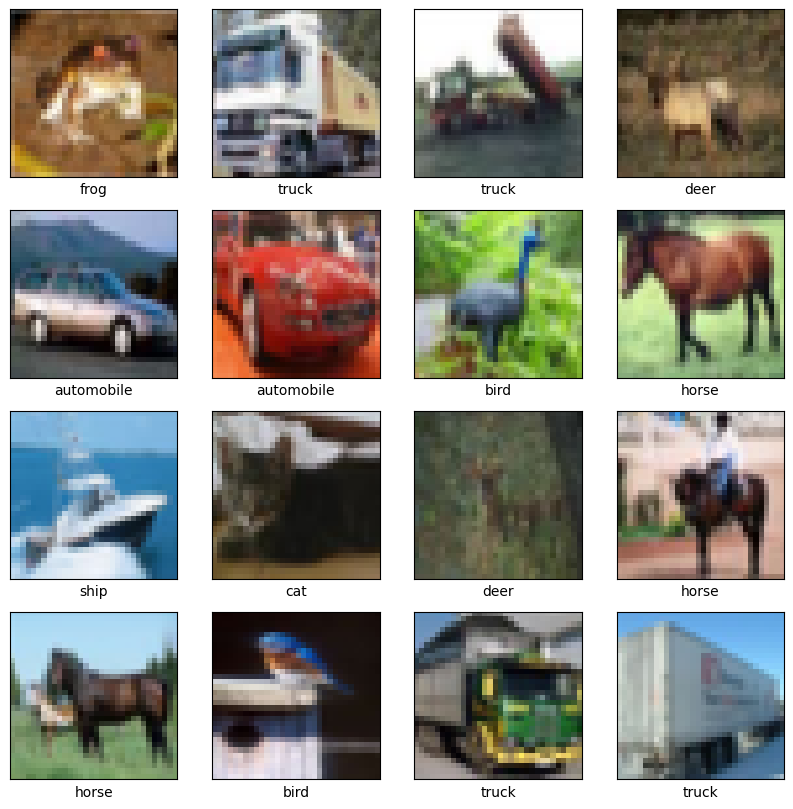

In [54]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [55]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
# Assuming `images` is your (50000, 32, 32, 3) array
# Average across the last axis (axis=3), which is the color channel
import numpy as np
X_train = np.mean(X_train, axis=3).astype(np.uint8)

X_train.shape


(50000, 32, 32)

In [20]:
X_test = np.mean(X_test, axis=3).astype(np.uint8)

X_test.shape

(10000, 32, 32)

In [25]:
# Flatten the training and test data
x_train_flat = X_train.reshape(X_train.shape[0], -1)  # shape: (50000, 3072)
x_test_flat = X_test.reshape(X_test.shape[0], -1)  

In [45]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10



# Build the improved model
model = keras.Sequential()
model.add(layers.Input(shape=(1024,)))

# First dense block
model.add(layers.Dense(256, activation='sigmoid'))


# Second dense block
model.add(layers.Dense(128, activation='sigmoid'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Show model architecture
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               262400    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________


In [46]:
x_train_flat.shape

(50000, 1024)

In [47]:
# Assuming y_train has shape (50000, 1) or (50000,)
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [50]:
from tensorflow.keras.optimizers import SGD

# Create the SGD optimizer with a learning rate of 0.01
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

# Train the model with validation monitoring
history = model.fit(x_train_flat, y_train_one_hot,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test_flat, y_test_one_hot))

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 2.2574 - accuracy: 0.1303 - val_loss: 2.2666 - val_accuracy: 0.1296
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 2.2573 - accuracy: 0.1326 - val_loss: 2.2665 - val_accuracy: 0.1301
Epoch 3/50
391/391 [==============================] - 3s 6ms/step - loss: 2.2572 - accuracy: 0.1317 - val_loss: 2.2665 - val_accuracy: 0.1309
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 2.2571 - accuracy: 0.1321 - val_loss: 2.2665 - val_accuracy: 0.1300
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 2.2570 - accuracy: 0.1330 - val_loss: 2.2665 - val_accuracy: 0.1305
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 2.2570 - accuracy: 0.1324 - val_loss: 2.2665 - val_accuracy: 0.1297
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 2.2569 - accuracy: 0.1323 - val_loss: 2.2665 - val_accuracy: 0.1299
Epoch 

In [33]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

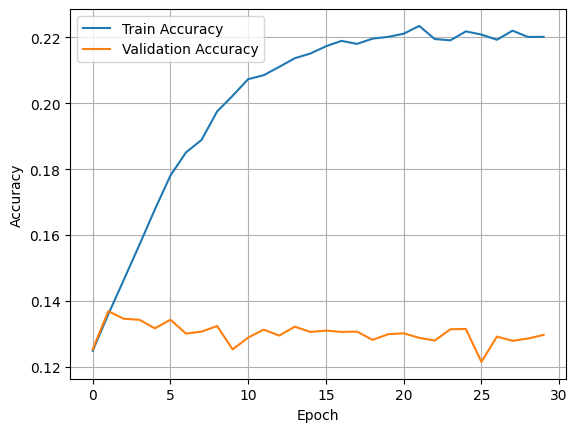

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [57]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=768, epochs=30, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/30
66/66 [==============================] - 23s 338ms/step - loss: 1.8479 - accuracy: 0.3231 - val_loss: 1.5564 - val_accuracy: 0.4331
Epoch 2/30
66/66 [==============================] - 22s 338ms/step - loss: 1.4565 - accuracy: 0.4714 - val_loss: 1.3821 - val_accuracy: 0.4948
Epoch 3/30
66/66 [==============================] - 25s 376ms/step - loss: 1.3172 - accuracy: 0.5290 - val_loss: 1.2508 - val_accuracy: 0.5494
Epoch 4/30
66/66 [==============================] - 24s 361ms/step - loss: 1.2039 - accuracy: 0.5743 - val_loss: 1.2609 - val_accuracy: 0.5441
Epoch 5/30
66/66 [==============================] - 23s 342ms/step - loss: 1.1219 - accuracy: 0.6075 - val_loss: 1.2070 - val_accuracy: 0.5801
Epoch 6/30
66/66 [==============================] - 23s 348ms/step - loss: 1.0605 - accuracy: 0.6293 - val_loss: 1.0818 - val_accuracy: 0.6161
Epoch 7/30
66/66 [==============================] - 23s 350ms/step - loss: 0.9978 - accuracy: 0.6494 - val_loss: 1.0659 - val_accuracy: 0.6244

KeyboardInterrupt: 

In [7]:
import numpy as np
def predict(model, data):
    probs = model.predict(data)
    label = np.argmax(probs, axis=1)
    return [class_names[_] for _ in label]


__let's test the model on some the test samples__

In [8]:
sample = np.random.permutation(len(X_test))[:16]
inputs = X_test[sample]
true_labels = y_test[sample]
labels = predict(model, inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


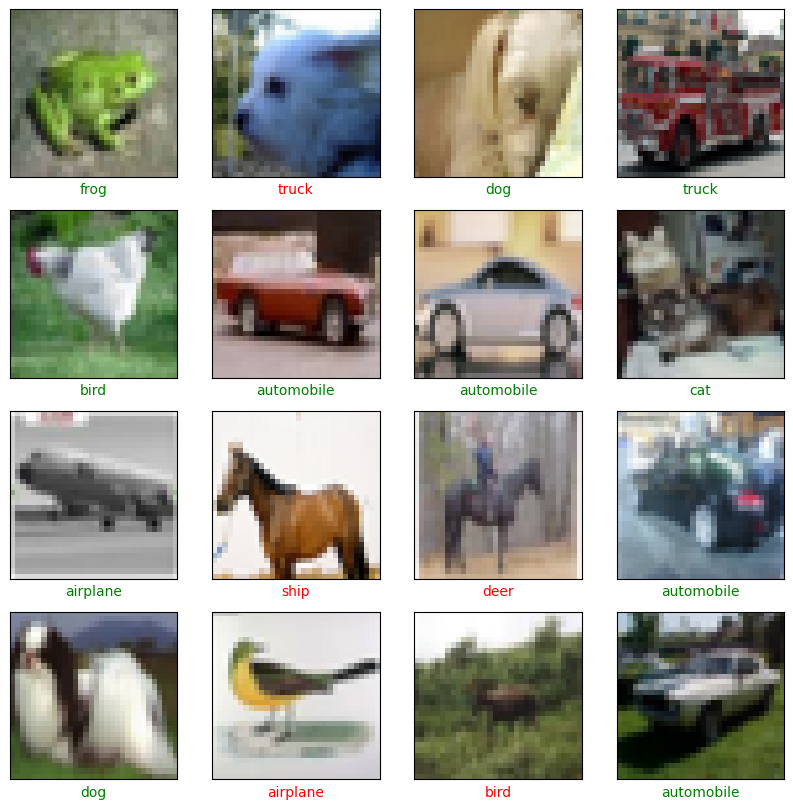

Accuracy: 68 %


In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
t_correct = 0
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(inputs[i], cmap=plt.cm.binary)
    correctness = class_names[true_labels[i][0]] == labels[i]
    if correctness: t_correct += 1
    color = "green" if correctness else "red"
    name = f"{labels[i]}"
    plt.xlabel(name, color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()
print("Accuracy:", int(100*t_correct/16), '%')

In [58]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_22 (Dense)            (None, 512)               37749248  
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 37,849,162
Trainable params: 37,849,162


In [ ]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=768, epochs=30, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/30
66/66 [==============================] - 186s 3s/step - loss: 1.9343 - accuracy: 0.3373 - val_loss: 1.5864 - val_accuracy: 0.4335
Epoch 2/30
66/66 [==============================] - 186s 3s/step - loss: 1.4218 - accuracy: 0.4931 - val_loss: 1.3598 - val_accuracy: 0.5191
Epoch 3/30
66/66 [==============================] - 182s 3s/step - loss: 1.2585 - accuracy: 0.5566 - val_loss: 1.3152 - val_accuracy: 0.5294
Epoch 4/30
66/66 [==============================] - 190s 3s/step - loss: 1.1289 - accuracy: 0.6013 - val_loss: 1.1914 - val_accuracy: 0.5857
Epoch 5/30
18/66 [=======>......................] - ETA: 2:19 - loss: 1.0276 - accuracy: 0.6402